In [1]:
from IPython.display import Image
import graphviz 
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning))

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.shape

(21613, 21)

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.00128628,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.00516023,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.0185252,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00272109,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.0115924,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


In [7]:
data.corr().unstack().sort_values().drop_duplicates()

zipcode        long            -0.564072
yr_built       condition       -0.361417
zipcode        yr_built        -0.346869
               sqft_living15   -0.279033
condition      floors          -0.263768
sqft_above     zipcode         -0.261190
sqft_basement  floors          -0.245705
yr_built       yr_renovated    -0.224874
bathrooms      zipcode         -0.203866
sqft_living    zipcode         -0.199430
grade          zipcode         -0.184862
sqft_above     condition       -0.158214
zipcode        bedrooms        -0.152668
lat            yr_built        -0.148122
zipcode        sqft_lot15      -0.147221
sqft_basement  long            -0.144765
condition      grade           -0.144674
id             sqft_lot15      -0.138798
long           lat             -0.135512
yr_built       sqft_basement   -0.133124
sqft_lot       id              -0.132109
               zipcode         -0.129574
bathrooms      condition       -0.124982
condition      long            -0.106500
sqft_living15  c

In [8]:
columns = list(data.columns)
target_price = data['price']
columns.remove('price')

In [9]:
data['date'] = data['date'].apply(pd.to_datetime)

In [10]:
data['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [11]:
from sklearn.model_selection import train_test_split


data = data[columns]
data.date = pd.to_timedelta(data.date).dt.total_seconds().astype(int)

# data = data.drop('date', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target_price, 
                                                    random_state=42)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  """


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6989736098282406
0.7059211556319754


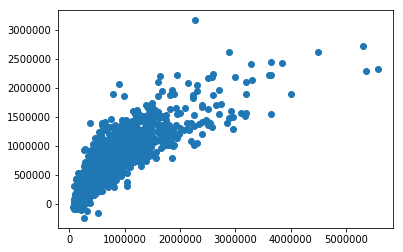

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [14]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=100).fit(X_train_scaled, y_train)
print(linear_svr.score(X_train_scaled, y_train))
print(linear_svr.score(X_test_scaled, y_test))

0.16077815432534492
0.14882159165039388


In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
print(tree_reg.score(X_train, y_train))
print(tree_reg.score(X_test, y_test))

1.0
0.7437997716316802


## Отбор параметров

In [16]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid  = {
    'alpha': np.logspace(-7, 5, 13)
}

In [42]:
lasso = linear_model.Lasso()
lasso_grid = GridSearchCV(reg, param_grid, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

print("accuracy :",lasso_grid.best_score_)

accuracy : 0.6974187668356233


In [37]:
from sklearn import linear_model

reg = linear_model.Ridge()
reg_grid = GridSearchCV(reg, param_grid, cv=10)
reg_grid.fit(X_train, y_train)

print("accuracy :",reg_grid.best_score_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.28927e-30): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.6316e-30): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.70949e-29): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31857e-30): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.12333e-29): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarnin

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.28541e-26): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.28478e-26): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.29498e-26): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.32338e-26): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.31442e-25): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

accuracy : 0.6973468290596987


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.26212e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.24273e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.2375e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.25017e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.25087e-19): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarnin

In [36]:
param_grid = {
    'C': np.logspace(-7, 7, 15),
}

lin_svr = LinearSVR()
svr_grid = GridSearchCV(lin_svr, param_grid, cv=5)
svr_grid.fit(X_train_scaled, y_train)

print("accuracy :",svr_grid.best_score_)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy : 0.6560109659564788


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
